# Lab 2: Data Preparation

- encoded all categorical attributes as numerical,
- treated/filled in missing values
- applied scaler where necessary
- treated outliers appropriately
- created at least one new feature from the existing ones.

In the end, save the prepared dataset as a CSV file on your hard disk.

## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [2]:
# Checking for missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [3]:
# Make a copy of dataset before transformation
df_original = df

## B. Process and Encode the Categorical Features

### Encode Ordinal Categorical Attributes 

In [4]:
df['education'].value_counts()

df['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

In [5]:
# Education mapper

scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

In [6]:
# Month mapper
scale_mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [7]:
# One-hot encode the categorical cols with NaNs

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,8,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,8,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,8,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,8,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,8,208,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,NaN,2785,16,8,327,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,1.0,127,16,8,1334,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,0.0,1154,17,8,231,1,-1,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,0.0,4343,20,8,185,1,-1,0,0,...,1,0,0,1,1,0,0,1,0,1
1999,40.0,1.0,6403,22,8,208,2,-1,0,0,...,0,0,0,1,1,0,0,0,0,1


## C. Treatment of Missing Values in Numerical Columns

In [9]:
# Find nulls/NaNs in the data

df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

Column `education`, in particular, contains NaNs while `age` has nulls.

### Imputing Missing Values

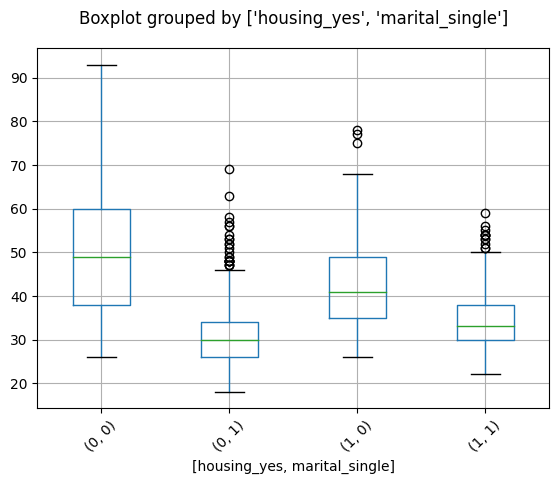

In [13]:
df.boxplot(column='age', by=['housing_yes','marital_single'], rot=45)
plt.title("")
plt.show()

In [14]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='housing_yes',  
                        aggfunc=np.median)
ptable

housing_yes,0,1
marital_single,,
0,49.0,41.0
1,30.0,33.0


In [16]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_single'], x['housing_yes']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [17]:
df['education'].fillna(df['education'].median(), inplace=True)

## D. Rescaling Features

In [18]:
df['education'] = df['education']/3